<a href="https://colab.research.google.com/github/Avigail-Spira/CS-381/blob/main/A_Spira_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Wine Dataset
* INDEX - unique ID
* TARGET- # of cases sold
* Acid Index- measures total acidity of wine via a weighted average 
* Alcohol-  alcohol content 
* Chlorides- chloride content
* Citric Acid- citric acid content
* Density- density of the wine 
* Fixed Acidity- fixed acidity of the wine 
* Free Sulfur Dioxide- sulfur dioxide content of the wine 
* Label Appeal- subjective marketing score that indicates the appeal of
the design of the label on the bottle 
* Residual Sugar- residual sugar content of the wine 
* STARS- wine rating as determined by experts (4 = excellent; 1=Poor)
* Sulphates- sulfate content of the wine 
* Total Sulfur Dioxide- total sulfur dioxide content of the wine 
* Volatile Acidity- volatile acid content of the wine. Usually ranges between .12-.14 g/100 mL 
* pH- pH of the wine. Range is usually from 2.5 to about 4.5 pH


Can we find correlations between attributes of wine? Are ther outliers and what should we do with them?

In [2]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv')

#Keep a copy of original data as a precaution
df_origina = df

##EDA

In [7]:
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [ ]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


The mean of acid index seems very off because the acidity should be much lower. Something is wrong with the data there. 

In [8]:
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

There are many missing values which need to be dealt with

In [9]:
len(df)

12795

In [10]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


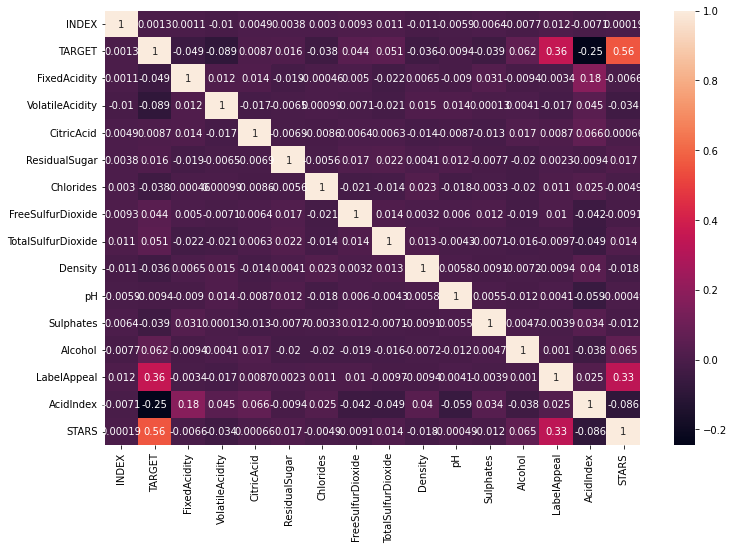

In [11]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

Stars is highly correlated with Target.

In [ ]:
df.min()

INDEX                   1.00000
TARGET                  0.00000
FixedAcidity          -18.10000
VolatileAcidity        -2.79000
CitricAcid             -3.24000
ResidualSugar        -127.80000
Chlorides              -1.17100
FreeSulfurDioxide    -555.00000
TotalSulfurDioxide   -823.00000
Density                 0.88809
pH                      0.48000
Sulphates              -3.13000
Alcohol                -4.70000
LabelAppeal            -2.00000
AcidIndex               4.00000
STARS                   1.00000
dtype: float64

There should not be negative values for composition of wine or for label appeal

In [ ]:
df.max()

INDEX                 16129.00000
TARGET                    8.00000
FixedAcidity             34.40000
VolatileAcidity           3.68000
CitricAcid                3.86000
ResidualSugar           141.15000
Chlorides                 1.35100
FreeSulfurDioxide       623.00000
TotalSulfurDioxide     1057.00000
Density                   1.09924
pH                        6.13000
Sulphates                 4.24000
Alcohol                  26.50000
LabelAppeal               2.00000
AcidIndex                17.00000
STARS                     4.00000
dtype: float64

The max values seem normal

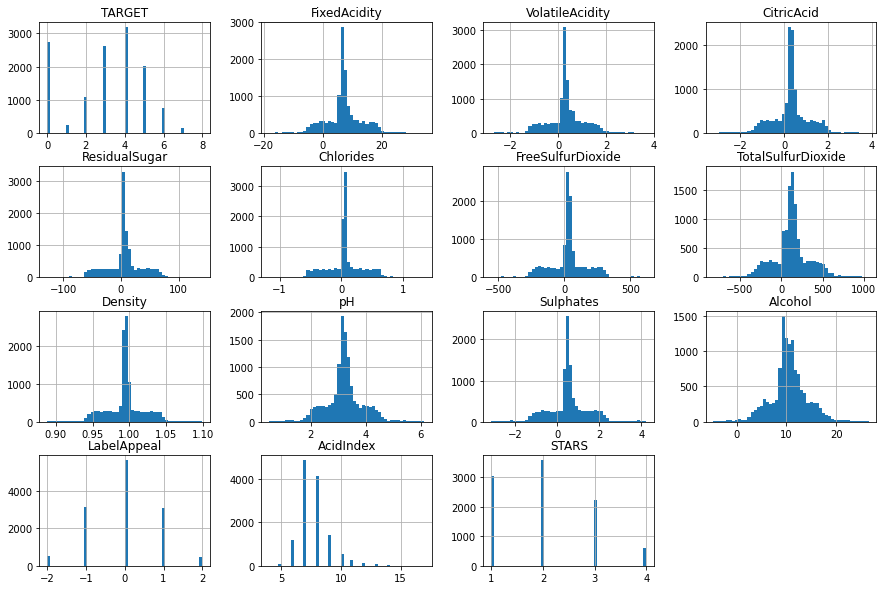

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

The data seems pretty normalized for many of the attributes. There is the largest quantity of wines at around the mean of the data. values. The most common star rating is 2 and label appeal is 0. 

##Data Prep / Feature Engineering
maybe some features can be dropped - id
adding columns
creating indicator variable- 
bin a bunch of features together
impute missing data
duplicate data
outliers


In [12]:
#May as well drop the first column because it adds no meaning
del df['INDEX']

In [13]:
#give columns meaningful names
df = df.rename(columns={'TARGET':'CasesSold', 'STARS':"Rating"})

In [14]:
#switch all the negative values to positive
df = df.abs()

In [15]:
#imputing- fill in missing values with the mean value
df['ResidualSugar'] = df['ResidualSugar'].fillna(value = df['ResidualSugar'].mean())
df['Chlorides'] = df['Chlorides'].fillna(value = df['Chlorides'].mean())
df['FreeSulfurDioxide'] = df['FreeSulfurDioxide'].fillna(value = df['FreeSulfurDioxide'].mean())
df['TotalSulfurDioxide'] = df['TotalSulfurDioxide'].fillna(value = df['TotalSulfurDioxide'].mean())
df['pH'] = df['pH'].fillna(value = df['pH'].mean())
df['Sulphates'] = df['Sulphates'].fillna(value = df['Sulphates'].mean())
df['Alcohol'] = df['Alcohol'].fillna(value = df['Alcohol'].mean())
df['Rating'] = df['Rating'].fillna(value = df['Rating'].mean())
df.isnull().sum()

CasesSold             0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
Rating                0
dtype: int64

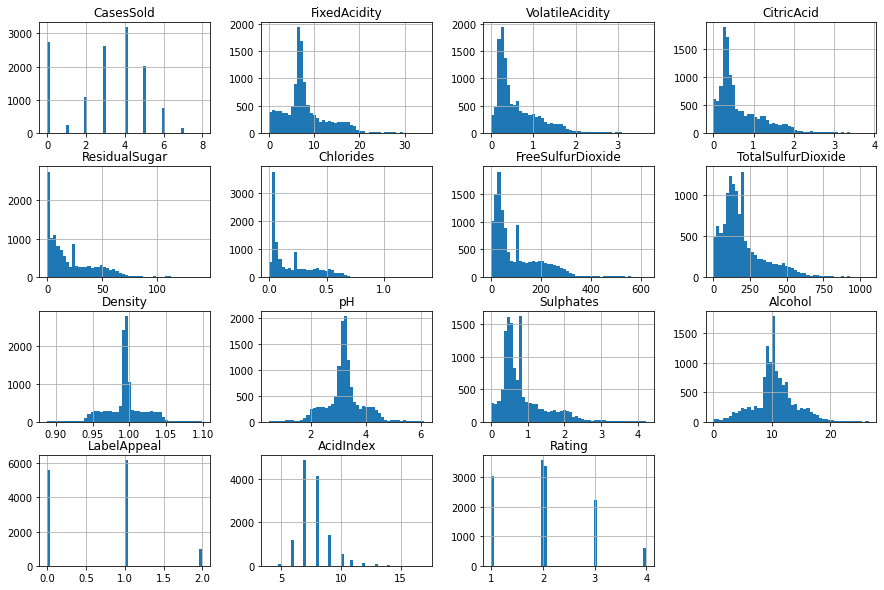

In [16]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Most attributes do not seem to be effected negatively by the changes we made to the data. Label appeal is off and values are missing. Residual sugar is also skewed more to the left than it was before. Everything is now above zero since we took out the negative values. 

In [17]:
#The acid index data is off so I am dropping it 
df.drop('AcidIndex',1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [18]:
#Switch the scale of label appeal to be from 1 to 5 so it does not include negative numbers
df.loc[df.LabelAppeal == 0, 'LabelAppeal'].count()
df['LabelAppeal'] = df['LabelAppeal'] + 2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


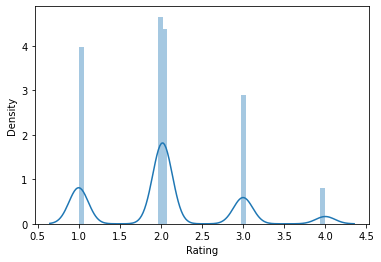

In [19]:
sns.distplot(df[df["Rating"].notnull()].Rating);

I fixed the data to remove the null values, to remove the negative values because in this case it did not make sense to have negative values. I also removed columns which did not add any value. All in all it did not seem to dramatically change the distributions of the data and the histograms were pretty similar to how they were originally. 